<h1 style="color:pink;">Introduction</h1>

 In this classification project, the dataset [diabetes_012_health_indicators_BRFSS2015.csv](https://www.kaggle.com/datasets) is utilized, which contains 253,680 clean survey responses from the CDC's 2015 Behavioral Risk Factor Surveillance System (BRFSS).

The target variable, Diabetes_012, consists of three classes:

0: No diabetes or only during pregnancy  
1: Prediabetes  
2: Diabetes

Additionally, the dataset comprises 21 feature variables. Several steps will be followed to select and optimize models for high performance and accuracy.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [21]:
# Load the dataset into a DataFrame
df=data = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')

# Shows the first 5 rows to get a quick look at the data
print(data.head())

   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1     

In [8]:
# Display the number of rows (samples) and columns (features) in the dataset
print("Initial shape of the dataframe:", data.shape)

Initial shape of the dataframe: (253680, 22)


In [9]:
# Display the statistical summary of the dataset, including count, mean, std, min, 25th percentile, median, 75th percentile, and max for each numerical column
print(data.describe)

<bound method NDFrame.describe of         Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                0.0     1.0       1.0        1.0  24.0     0.0     0.0   
...              ...     ...       ...        ...   ...     ...     ...   
253675           0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676           2.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677           0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678           0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679           2.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealt

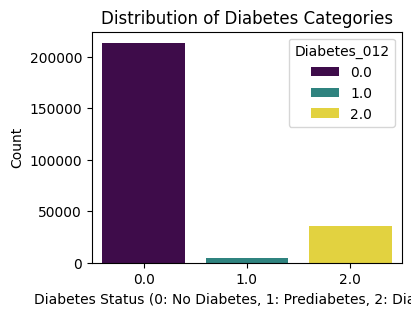

In [ ]:
# Created a bar plot to V=visualize the distribution of diabetes categories in the dataset
plt.figure(figsize=(4, 3))
sns.countplot(x=data["Diabetes_012"], hue=data["Diabetes_012"], palette="viridis")
plt.title("Distribution of Diabetes Categories")
plt.xlabel("Diabetes Status (0: No Diabetes, 1: Prediabetes, 2: Diabetes)")
plt.ylabel("Count")
plt.show()

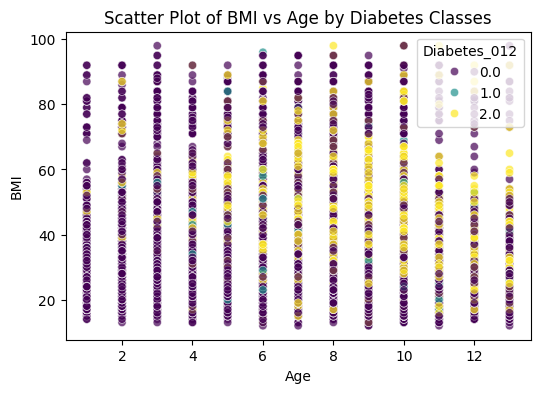

In [ ]:
# Created a scatter plot to analyze the relationship between Age and BMI across the diabetes classes
plt.figure(figsize=(6, 4))
sns.scatterplot(x=data['Age'], y=data['BMI'], hue=data['Diabetes_012'], palette="viridis", alpha=0.7)
plt.title("Scatter Plot of BMI vs Age by Diabetes Classes")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.show()

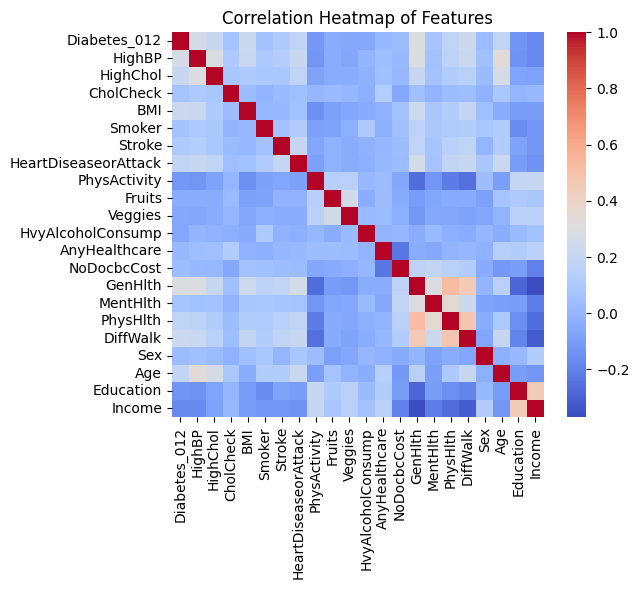

In [ ]:
# Created a Heatmap to visualize correlations between all features in the dataset
plt.figure(figsize=(6, 5))
corr = data.corr()
sns.heatmap(corr, annot=False, cmap="coolwarm", cbar=True, fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()


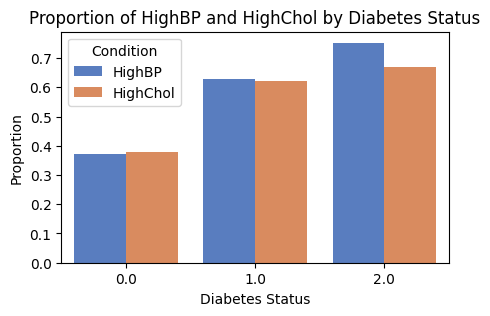

In [ ]:
# Created a bar plot of HighBP and HighChol by Diabetes Status
plt.figure(figsize=(5, 3))

# Group the dataset by 'Diabetes_012' and calculate mean values for 'HighBP' and 'HighChol'
highbp_chol = data.groupby("Diabetes_012")[["HighBP", "HighChol"]].mean().reset_index()

# Melt the data so that 'HighBP' and 'HighChol' are in the same column for easier plotting
highbp_chol_melted = highbp_chol.melt(id_vars=["Diabetes_012"], value_vars=["HighBP", "HighChol"], 
                                      var_name="Condition", value_name="Proportion")

sns.barplot(data=highbp_chol_melted, x="Diabetes_012", y="Proportion", hue="Condition", palette="muted")
plt.title("Proportion of HighBP and HighChol by Diabetes Status")
plt.xlabel("Diabetes Status")
plt.ylabel("Proportion")
plt.legend(title="Condition")
plt.show()


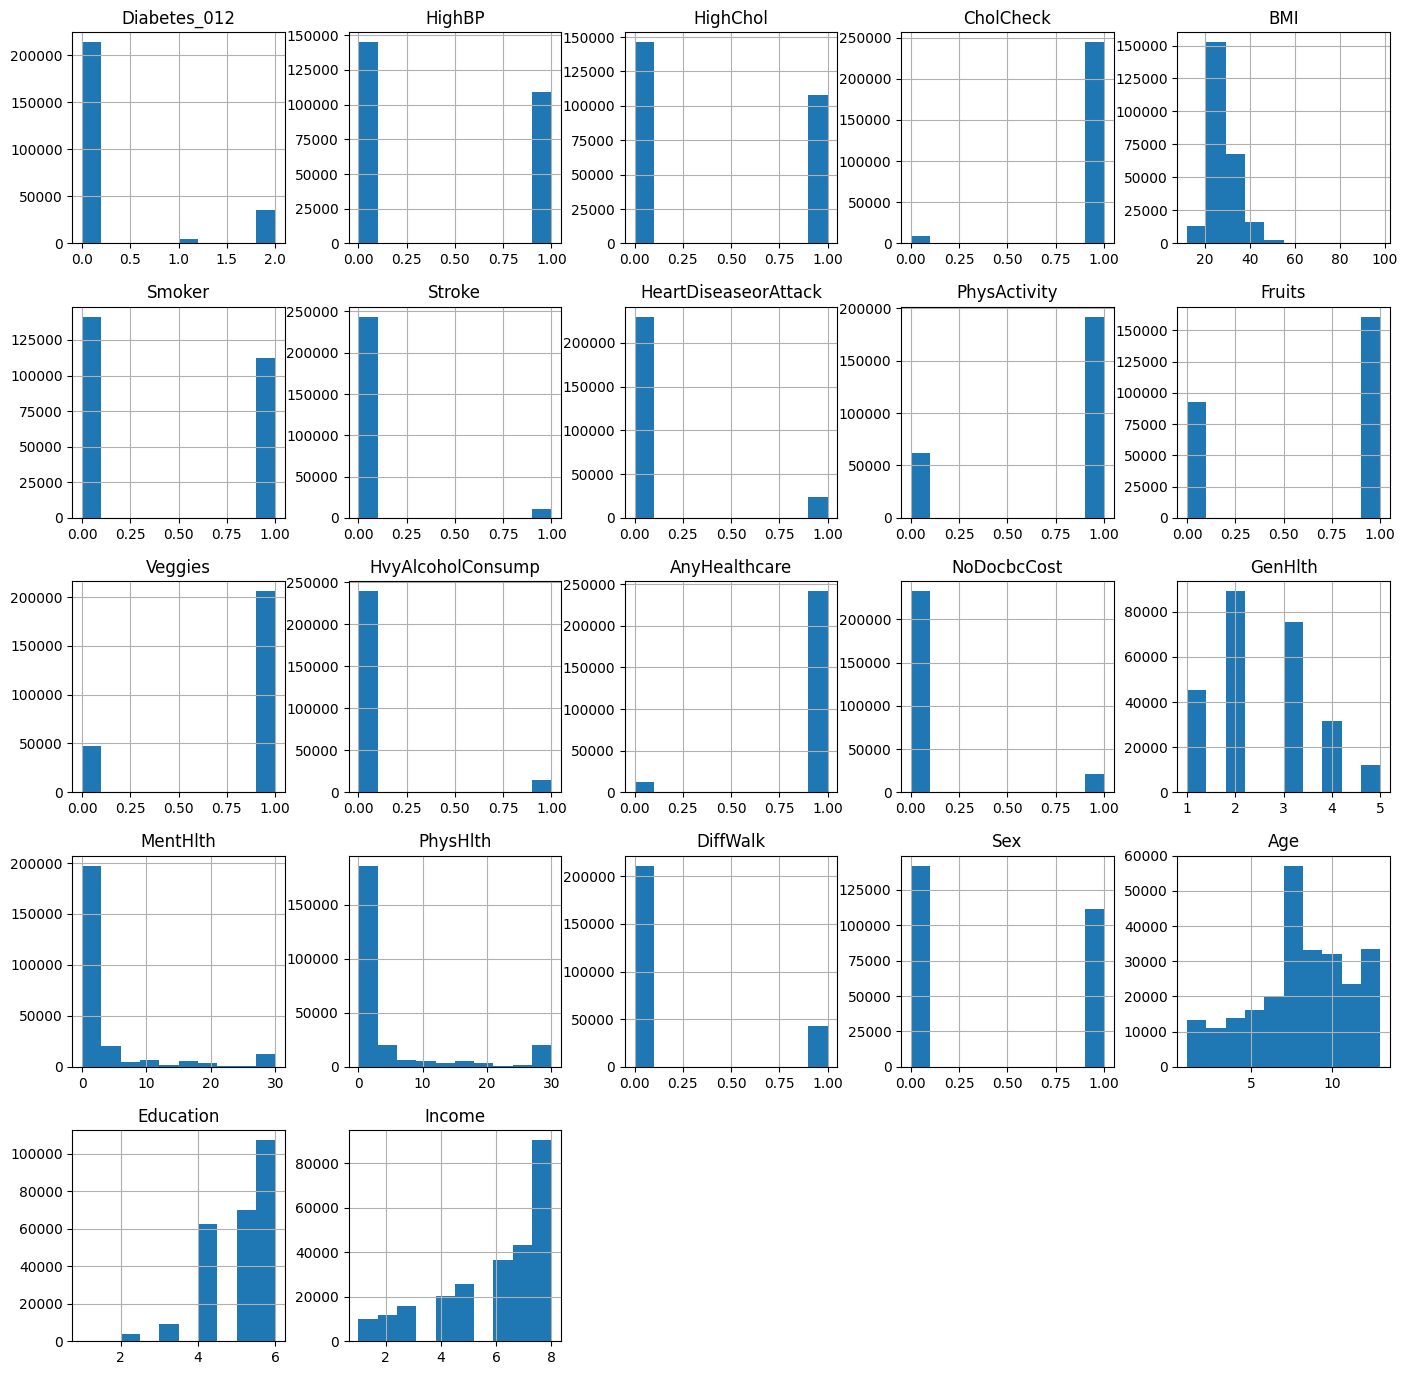

In [ ]:
# Created a Histogram to visualize the distribution of all attributes in the dataset
data.hist(figsize = (17, 17))  # Create histograms for all columns in the DataFrame
plt.show() 

In [15]:
# Check for missing values in each column and print a summary
print("Missing values per column:\n", data.isnull().sum())
if data.isnull().sum().sum() == 0:
    print("No missing values found in the dataset.")


Missing values per column:
 Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64
No missing values found in the dataset.


In [16]:
# Remove columns with over 95% of the same value (low variability)
# This loop removes unhelpful columns, making the dataset more useful
for column in data.columns:
    if data[column].value_counts(normalize=True, dropna=False).iloc[0] > 0.95:
        data.drop(column, axis=1, inplace=True)

print("Shape of the dataframe after dropping columns:", data.shape)

Shape of the dataframe after dropping columns: (253680, 19)


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter



# Separate features and target
X = data.drop('Diabetes_012', axis=1)
y = data['Diabetes_012']

# Check class distribution before SMOTE
print("Class distribution before SMOTE:", Counter(y))

# Standardize numerical features
continuous_columns = [col for col in X.columns if data[col].dtype in ['int64', 'float64']]
scaler = StandardScaler()
X[continuous_columns] = scaler.fit_transform(X[continuous_columns])

# Split the data into training and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)

# Apply SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Check the balanced class distribution
from collections import Counter
print("Class distribution after SMOTE:", Counter(y_train_balanced))



Class distribution before SMOTE: Counter({0.0: 213703, 2.0: 35346, 1.0: 4631})
Training set shape: (177576, 18)
Validation set shape: (38052, 18)
Test set shape: (38052, 18)
Class distribution after SMOTE: Counter({2.0: 149523, 0.0: 149523, 1.0: 149523})


In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize Decision Tree with default parameters
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_balanced, y_train_balanced)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

# Confusion Matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix for Decision Tree:")
print(conf_matrix_dt)


Decision Tree Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.85      0.87     32150
         1.0       0.03      0.04      0.03       708
         2.0       0.30      0.35      0.32      5194

    accuracy                           0.77     38052
   macro avg       0.40      0.41      0.41     38052
weighted avg       0.79      0.77      0.77     38052

Confusion Matrix for Decision Tree:
[[27290   739  4121]
 [  503    27   178]
 [ 3155   238  1801]]


In [21]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest with default parameters
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_balanced, y_train_balanced)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix for Random Forest:")
print(conf_matrix_rf)


Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90     32150
         1.0       0.04      0.00      0.01       708
         2.0       0.42      0.34      0.38      5194

    accuracy                           0.83     38052
   macro avg       0.45      0.42      0.43     38052
weighted avg       0.80      0.83      0.82     38052

Confusion Matrix for Random Forest:
[[29773    58  2319]
 [  550     3   155]
 [ 3394    21  1779]]


### 4. Scale Numeric Features

To normalize the numerical features in the dataset, we use the `StandardScaler` from `sklearn.preprocessing` to standardize the selected features: **BMI**, **MentHlth**, **PhysHlth**, and **Age**. This will ensure the values of these columns have a mean of 0 and a standard deviation of 1, which is important for many machine learning algorithms to perform optimally.


In [24]:
# 4. Scale Numeric Features
from sklearn.preprocessing import StandardScaler  # Import the StandardScaler

scaler = StandardScaler()
numeric_features = ["BMI", "MentHlth", "PhysHlth", "Age"]  # Adjust as necessary
data_cleaned[numeric_features] = scaler.fit_transform(data_cleaned[numeric_features])


## 5. Handle Class Imbalance (Diabetes_012)

In this step, we address the issue of class imbalance in the dataset using **SMOTE** (Synthetic Minority Over-sampling Technique) to oversample the minority class. The following steps are performed:

1. **Separate Features and Target Variable**: 
   - The target variable `Diabetes_012` is separated from the feature set `X`, and the target `y` is assigned to the column `Diabetes_012`.

2. **Apply SMOTE**:
   - **SMOTE** is applied to oversample the minority class in the dataset. This technique generates synthetic samples to balance the class distribution.
   - `SMOTE` is instantiated with a random seed (`random_state=42`) for reproducibility.

3. **Split Data into Training and Testing Sets**:
   - The dataset is then split into training and testing sets using `train_test_split` from scikit-learn. The test size is set to 20% of the data, and the random state is fixed to ensure consistency between runs.

4. **Summarize Preprocessing Steps**:
   - A summary of the preprocessing steps is stored in the `preprocessing_summary` dictionary, which includes:
     - The number of missing values before and after cleaning.
     - The class distribution before and after balancing using SMOTE.
     - A list of numeric features that were scaled or processed.

In [ ]:
# 5. Handle Class Imbalance (Diabetes_012)

from imblearn.over_sampling import SMOTE  # Import SMOTE class
from sklearn.model_selection import train_test_split

missing_values = df.isnull().sum()


X = data_cleaned.drop("Diabetes_012", axis=1)
y = data_cleaned["Diabetes_012"]

# Apply SMOTE for oversampling minority classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Summarize Preprocessing Steps
preprocessing_summary = {
    "Missing Values Before Cleaning": missing_values.sum(),
    "Missing Values After Cleaning": data_cleaned.isnull().sum().sum(),
    "Original Class Distribution": y.value_counts().to_dict(),
    "Balanced Class Distribution": pd.Series(y_resampled).value_counts().to_dict(),
    "Features Scaled": numeric_features,
}

print(preprocessing_summary)

{'Missing Values Before Cleaning': 0, 'Missing Values After Cleaning': 0, 'Original Class Distribution': {0.0: 213703, 2.0: 35346, 1.0: 4631}, 'Balanced Class Distribution': {0.0: 213703, 2.0: 213703, 1.0: 213703}, 'Features Scaled': ['BMI', 'MentHlth', 'PhysHlth', 'Age']}


### Logistic Regression Model
The code below initializes and trains a logistic regression model using the following parameters:

- **C=1**: Regularization strength (default). A smaller value specifies stronger regularization.
- **penalty='l2'**: Regularization method. The default L2 regularization is applied.
- **solver='liblinear'**: Optimization algorithm for small datasets or binary classification tasks.
- **max_iter=200**: Maximum number of iterations to converge.

The model is then fitted to the training data (`X_train` and `y_train`).


In [26]:
# Logistic Regression

# Import LogisticRegression from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


log_reg = LogisticRegression(C=1, penalty='l2', solver='liblinear', max_iter=200)
log_reg.fit(X_train, y_train)


LogisticRegression(C=1, max_iter=200, solver='liblinear')

### Random Forest Model Implementation with Hyperparameter Tuning

In this step, we implement a **Random Forest Classifier** with hyperparameter tuning using **GridSearchCV**. The model is optimized by searching over a specified hyperparameter grid to find the best combination for predicting the target variable.

- **Parameter Grid**: Defines the hyperparameters to be tuned, including the number of estimators (`n_estimators`).
- **GridSearchCV**: Used to perform cross-validation on the hyperparameters and select the best model based on accuracy.

In [31]:
# Random Forest Model
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'n_estimators': [10, 20, 30],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)
grid_rf = GridSearchCV(rf_model, param_grid_rf, cv=3, n_jobs=-1, scoring='accuracy')
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_
print(f"Best Parameters: {grid_rf.best_params_}")



Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 30}


### Decision Tree Model Implementation

In this section, we are implementing a Decision Tree model with hyperparameter tuning using `GridSearchCV`. The parameters are tuned based on the `criterion` (either 'gini' or 'entropy').

In [27]:
# Decision Tree Model
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier  # Add this import
from sklearn.model_selection import GridSearchCV, train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

param_grid_dt = {
    # Uncomment to try different hyperparameters
    # 'max_depth': [None, 5, 10, 15, 20],
    # 'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 3, 5, 7],
    'criterion': ['gini', 'entropy']
}

dt_model = DecisionTreeClassifier(random_state=42)
grid_dt = GridSearchCV(dt_model, param_grid_dt, cv=5, n_jobs=-1, scoring='accuracy')
grid_dt.fit(X_train, y_train)
best_dt = grid_dt.best_estimator_
print(f"Best Parameters: {grid_dt.best_params_}")


Best Parameters: {'criterion': 'gini', 'min_samples_leaf': 1}


### K-Nearest Neighbors (KNN) Model with Grid Search

The following code applies K-Nearest Neighbors (KNN) algorithm with a grid search to optimize the hyperparameter `n_neighbors`. We use a training-validation split, where 20% of the data is used for validation. The best KNN model is determined using the grid search based on accuracy.

In [28]:
# K-Nearest Neighbors - Hyperparameter Grid

# Import necessary libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid_knn = {  
    'n_neighbors': [3, 7, 11],  
#   'weights': ['uniform', 'distance'],     
#   'metric': ['euclidean', 'manhattan']  
}  

# Train-validation split for KNN
X_train_knn, X_val_knn, y_train_knn, y_val_knn = train_test_split(X_train, y_train, test_size=0.2, random_state=42)  

# Initialize KNN model and perform grid search
knn_model = KNeighborsClassifier()  
grid_search_knn = GridSearchCV(knn_model, param_grid_knn, cv=3, scoring='accuracy', n_jobs=-1)  
grid_search_knn.fit(X_train_knn, y_train_knn)   

# Get the best KNN model
best_knn = grid_search_knn.best_estimator_
print(f"Best Parameters for KNN: {grid_search_knn.best_params_}")


Best Parameters for KNN: {'n_neighbors': 3}


### Stacking Classifier Implementation

### Description
The `StackingClassifier` combines multiple models (base estimators) to make predictions, using a meta-model for final predictions. The base models include:

- Logistic Regression (`log_reg`)
- Best Random Forest model (`best_rf`)
- Best Decision Tree model (`best_dt`)
- Best K-Nearest Neighbors model (`best_knn`)

The meta-model is a Logistic Regression model with `max_iter=200`. The stacking classifier uses 3-fold cross-validation (`cv=3`) and runs computations in parallel (`n_jobs=-1`).

In [32]:
# Define the Stacking Classifier

# Import necessary libraries
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

stacking_clf = StackingClassifier(
    estimators=[
        ('log_reg', log_reg),                # Logistic Regression
        ('random_forest', best_rf),         # Best Random Forest model from GridSearchCV
        ('decision_tree', best_dt),         # Best Decision Tree model from GridSearchCV
        ('knn', best_knn),                  # Best K-Nearest Neighbors model from GridSearchCV
    ],
    final_estimator=LogisticRegression(max_iter=200),  # Meta-model
    cv=3,                                              # Cross-validation with 3 folds
    n_jobs=-1                                          # Use all available CPU cores
)

# Fit the Stacking Classifier on training data
stacking_clf.fit(X_train, y_train)


StackingClassifier(cv=3,
                   estimators=[('log_reg',
                                LogisticRegression(C=1, max_iter=200,
                                                   solver='liblinear')),
                               ('random_forest',
                                RandomForestClassifier(max_depth=30,
                                                       n_estimators=30,
                                                       n_jobs=-1,
                                                       random_state=42)),
                               ('decision_tree',
                                DecisionTreeClassifier(random_state=42)),
                               ('knn', KNeighborsClassifier(n_neighbors=3))],
                   final_estimator=LogisticRegression(max_iter=200), n_jobs=-1)

<h1 style="color:pink;">7. Model Evaluation</h1>

### Overview
The `evaluate_model` function is used to train and evaluate machine learning models on a given dataset. It calculates several evaluation metrics, such as accuracy, precision, recall, F1 score, and ROC-AUC, and prints the results for each model. This function is useful for comparing multiple models to determine the best-performing one.

In [34]:
# Function to train and evaluate models
def evaluate_model(model, model_name, X_train, y_train, X_test, y_test):
    """
    This function trains and evaluates the given model using various evaluation metrics.

    Parameters:
    model (sklearn model): The machine learning model to be trained and evaluated.
    model_name (str): The name of the model (for display purposes).
    X_train (array-like): The training features.
    y_train (array-like): The target variable for the training data.
    X_test (array-like): The test features.
    y_test (array-like): The target variable for the test data.

    Returns:
    dict: A dictionary containing the model's evaluation metrics for comparison.
    """
    
    # Step 1: Train the model on the training dataset
    model.fit(X_train, y_train)
    
    # Step 2: Make predictions on both training and testing datasets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Step 3: Calculate evaluation metrics for the model
    # Accuracy on training and testing data
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Precision, Recall, and F1 Score (using weighted average for multi-class classification)
    precision = precision_score(y_test, y_test_pred, average="weighted")
    recall = recall_score(y_test, y_test_pred, average="weighted")
    f1 = f1_score(y_test, y_test_pred, average="weighted")

    # ROC-AUC score (only for models that have predict_proba method)
    roc_auc = (
        roc_auc_score(y_test, model.predict_proba(X_test), multi_class="ovr")
        if hasattr(model, "predict_proba")
        else None
    )

    # Step 4: Print out the evaluation results
    print(f"Model: {model_name}")
    print(f"Train Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    
    # If ROC-AUC score is available, print it
    if roc_auc is not None:
        print(f"ROC-AUC: {roc_auc:.4f}")
    
    # Print the full classification report
    print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

    # Step 5: Return the metrics in a dictionary for comparison with other models
    return {
        "model": model_name,
        "accuracy": test_accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "roc_auc": roc_auc,
    }


### Model Training, Evaluation, and Comparison

This section of the code is focused on training and evaluating various machine learning models, followed by a comparison of their performance using several metrics. The models are trained on a training dataset (`X_train`, `y_train`) and evaluated on a test dataset (`X_test`, `y_test`). The performance metrics include accuracy, precision, recall, F1 score, and ROC-AUC (if applicable). These metrics are then plotted for comparison.

### Model Initialization

We begin by defining a list of machine learning models with their parameters. The models are:
- **Logistic Regression**: A binary classification model using the L2 regularization.
- **Random Forest**: An ensemble method that builds multiple decision trees and combines their results.
- **Decision Tree**: A tree-based model that splits data based on feature values.
- Additional models like K-Nearest Neighbors (KNN) and Support Vector Machines (SVM) are commented out and can be included as desired.

Model: Logistic Regression
Train Accuracy: 0.5277
Test Accuracy: 0.5264
Precision: 0.5148
Recall: 0.5264
F1 Score: 0.5129
ROC-AUC: 0.7181

Classification Report:
               precision    recall  f1-score   support

         0.0       0.59      0.68      0.64     42688
         1.0       0.44      0.29      0.35     42676
         2.0       0.51      0.60      0.55     42858

    accuracy                           0.53    128222
   macro avg       0.51      0.53      0.51    128222
weighted avg       0.51      0.53      0.51    128222

Model: Random Forest
Train Accuracy: 0.9247
Test Accuracy: 0.8855
Precision: 0.8857
Recall: 0.8855
F1 Score: 0.8856
ROC-AUC: 0.9701

Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.88      0.88     42688
         1.0       0.94      0.94      0.94     42676
         2.0       0.83      0.85      0.84     42858

    accuracy                           0.89    128222
   macro avg       0.89    

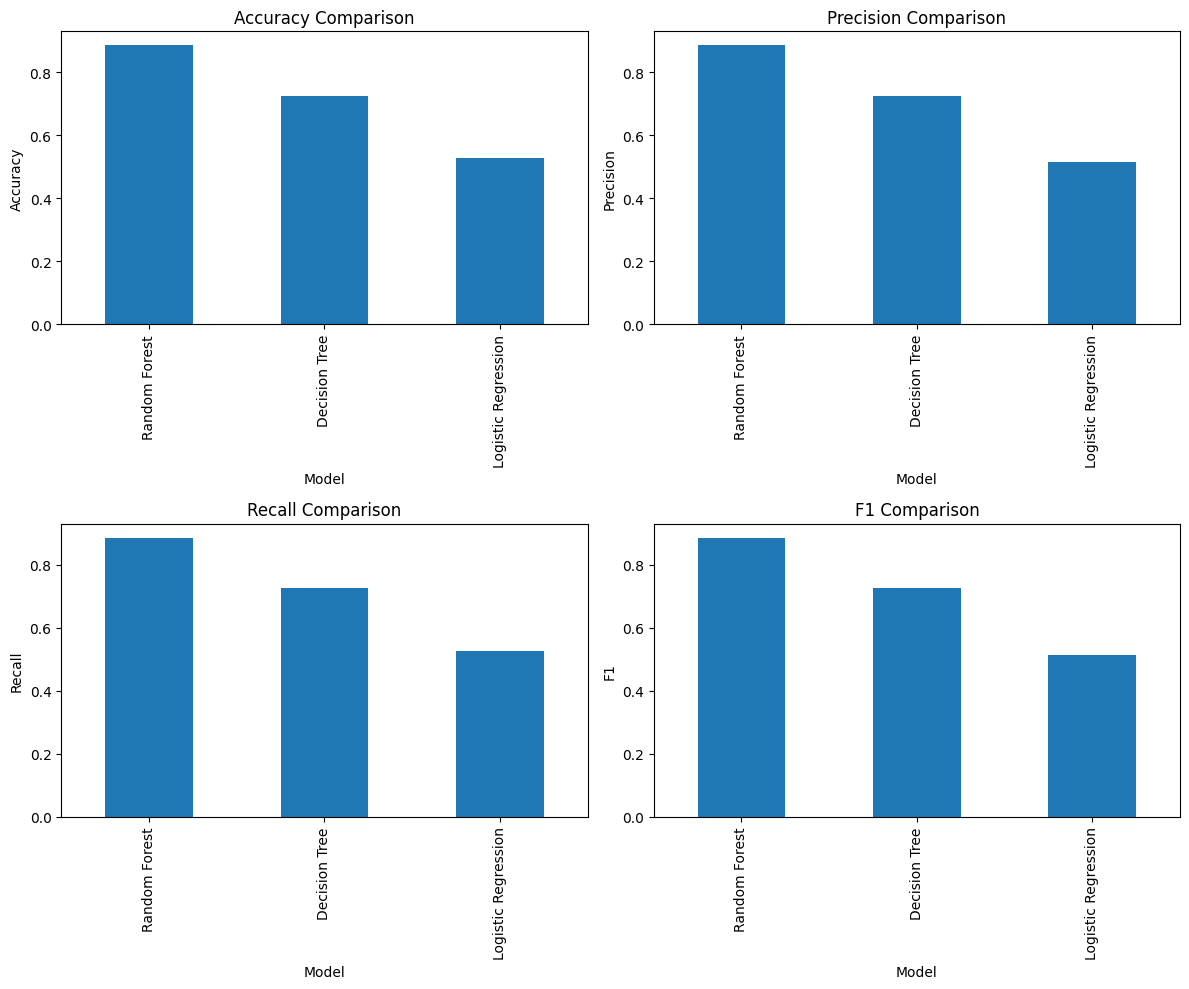

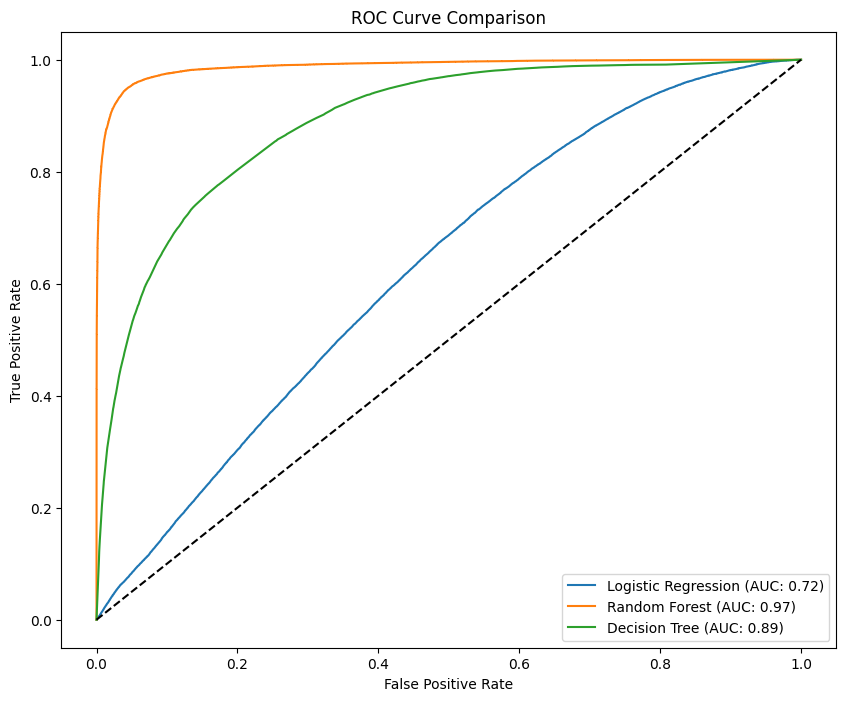

In [37]:
# Function to train and evaluate models

# Required imports
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
# Uncomment the following if needed:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC

def evaluate_model(model, model_name, X_train, y_train, X_test, y_test):
    # Training the model
    model.fit(X_train, y_train)
    
    # Making predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluation metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average="weighted")
    recall = recall_score(y_test, y_test_pred, average="weighted")
    f1 = f1_score(y_test, y_test_pred, average="weighted")
    roc_auc = (
        roc_auc_score(y_test, model.predict_proba(X_test), multi_class="ovr")
        if hasattr(model, "predict_proba")
        else None
    )

    # Printing evaluation results
    print(f"Model: {model_name}")
    print(f"Train Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    if roc_auc is not None:
        print(f"ROC-AUC: {roc_auc:.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

    # Return the results for comparison
    return {
        "model": model_name,
        "accuracy": test_accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "roc_auc": roc_auc,
    }

# Models with parameters
models = [
    ("Logistic Regression", LogisticRegression(C=1, penalty="l2", solver="liblinear", max_iter=200)),
    ("Random Forest", RandomForestClassifier(n_estimators=30, max_depth=20, min_samples_split=5, random_state=42)),
    ("Decision Tree", DecisionTreeClassifier(max_depth=15, min_samples_split=10, random_state=42)),
    # Uncomment the following models if needed:
    # ("KNN", KNeighborsClassifier(n_neighbors=5)),
    # ("SVM", SVC(kernel="linear", probability=True)),
]

# Evaluate and store results
results = []
for model_name, model in models:
    results.append(evaluate_model(model, model_name, X_train, y_train, X_test, y_test))

# Convert results to DataFrame for easier visualization and comparison
results_df = pd.DataFrame(results)

# Bar Plot for Accuracy, Precision, Recall, F1
metrics = ["accuracy", "precision", "recall", "f1"]
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Loop through each metric and plot a comparison
for ax, metric in zip(axes.flatten(), metrics):
    results_df.sort_values(by=metric, ascending=False).plot(
        x="model", y=metric, kind="bar", ax=ax, legend=False, title=f"{metric.capitalize()} Comparison"
    )
    ax.set_ylabel(metric.capitalize())
    ax.set_xlabel("Model")

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

# ROC Curves (if applicable)
plt.figure(figsize=(10, 8))

# Loop through each model and plot the ROC curve
for model_name, model in models:
    if hasattr(model, "predict_proba"):
        y_test_proba = model.predict_proba(X_test)
        fpr, tpr, _ = roc_curve(y_test, y_test_proba[:, 1], pos_label=model.classes_[1])
        plt.plot(fpr, tpr, label=f"{model_name} (AUC: {roc_auc_score(y_test, y_test_proba, multi_class='ovr'):.2f})")

# Plot the diagonal line for reference
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="best")
plt.show()
